In [1]:
import pandas as pd
import numpy as np
from PIL import Image, ImageDraw
from openslide import OpenSlide
from matplotlib import pyplot as plt
import os

In [2]:
# read annotation
csvobj = pd.read_pickle('1C1.pkl')
# read image size
impth = r'\\fatherserverdw\Q\research\images\CLUE\3D study\he\c1\1C1.ndpi'
imageobj = OpenSlide(impth)
image_size = imageobj.dimensions
(width,height) = image_size
img = Image.new('L', (width, height), 0) #0 for default pixel value
# convert annotation to binary mask


# edit this function in a way
# write each annotation with pixel value equal to their class ID

In [3]:
iter_order = [2,10,5,4,6,11,7,9,8,12,3,1]

2
10
5
4
6
11
7
9
8
12
3
1


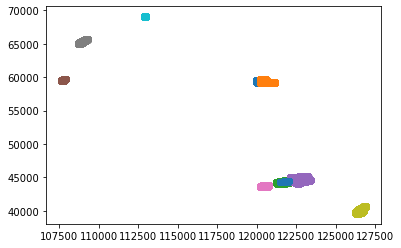

In [4]:
for i in iter_order:
#for index, row in csvobj.iterrows(): #iterate through each annotation circle\
    row = csvobj.iloc[i - 1]
    #print(row)
    color = i
    print(color)


    xycoord = np.squeeze(row['Coord'].astype('uint32'))

    plt.scatter(xycoord[:,0],xycoord[:,1])

    #plt.savefig('ok')

    xycoord = list(zip(xycoord[:,0],xycoord[:,1])) #turn [[,]] into tuples (,)


    ImageDraw.Draw(img).polygon(xycoord, outline=None, fill=color) #this fill value should be class ID





In [5]:

img2 = img.resize((round(width/10),round(height/10)))
dstfn = '1C1.png'
img2.save(dstfn)

In [6]:
# crop WSI images using annotation map

from openslide import OpenSlide
from skimage import measure

# open both wsi and annotation map
wsi_src = os.path.expanduser(r'\\fatherserverdw\Q\research\images\CLUE\3D study\he\c1')
wsi_fn = '1C1.ndpi'
wsipath = os.path.join(wsi_src, wsi_fn)

#anno_src = os.path.expanduser(r'\\Users\kyuha\PycharmProjects\wsi_analysis\ashley')
#anno_fn = '1C1temp.png'
#annotation_map_path = os.path.join(anno_src, anno_fn)

wsi = OpenSlide(wsipath)
annotation = Image.open('1C1.png') #convert to greyscale?
# this should not be zero

# iterate each class and each annotation object to make a crop
for classid in iter_order:

    annotation2crop = np.zeros_like(annotation)

    #all annotation for the current class id
    annotation2crop[np.array(annotation) == classid] = 1

    labeled_map =  measure.label(annotation2crop)
    #regionprops has properties of the label
    regionprops = measure.regionprops(labeled_map)
    #bounboxes is a tuple, (min_row, min_col, max_row, max_col)
    boundboxes = [(regionprops).bbox]

C:\ProgramData\Anaconda3\envs\digital_pathology\lib\site-packages\PIL\Image.py:2797: DecompressionBombWarning: Image size (120683520 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


AttributeError: 'list' object has no attribute 'bbox'

In [132]:
np.unique(np.array(annotation))

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13],
      dtype=uint8)

In [133]:
annotation2crop = np.zeros_like(annotation)

#all annotation for the current class id
annotation2crop[np.array(annotation) == classid] = 1


In [136]:
Image.fromarray(annotation2crop).save('temp.png')

In [135]:
labeled_map =  measure.label(annotation2crop)
#regionprops has properties of the label
regionprops = measure.regionprops(labeled_map)
regionprops

In [68]:
for objID, boundbox in enumerate(boundboxes):
     #crop at the boundaries
    imcrop = wsi.read_region(location=(boundbox[0],boundbox[1]),level=0,size=(boundbox[2],boundbox[3]))
    imcrop.save('class%d_obj%d.png'.format(classid,objID))


In [87]:
annotation2crop

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)